# Algorymt do rozpoznawania obrazów etykiet 

C: 2025.02.10 <br>
M: 2025.02.10


Copyright (c) 2025 Marek Kocinski

#### Import bibliotek


In [14]:
import cv2
import pytesseract
import json
from pathlib import Path
import numpy as np
from PIL import Image
import easyocr
import json
import matplotlib.pyplot as plt

In [2]:
current_dir: Path = Path.cwd()
products_dir = current_dir.parent / 'produkt-1'

In [3]:
pliki = [p.name for p in products_dir.glob('*.*')]
pliki

['IMG_4389.JPEG',
 '7048840005468.json',
 'IMG_4382.JPEG',
 'IMG_4392.JPEG',
 'IMG_4381.JPEG',
 'IMG_4390.JPEG',
 'serek-screen.png',
 'IMG_4385.JPEG',
 'IMG_4376.JPEG',
 'IMG_4383.JPEG',
 'IMG_4391.JPEG',
 '7048840005468.JPEG',
 'IMG_4375.JPEG',
 'IMG_4379.JPEG',
 'IMG_4377.JPEG',
 'IMG_4387.JPEG',
 'IMG_4380.JPEG',
 'IMG_4388.JPEG',
 'IMG_4384.JPEG']

In [ ]:
def show_image(image, title="Image"):
    plt.figure(figsize=(10,8))
    plt.title(title)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [28]:
def show_image2(image1, image2, title1="Image 1", title2="Image 2", cmap='gray'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
    
    ax1.imshow(image1, cmap=cmap)
    ax1.set_title(title1)
    ax1.axis('off')
    
    ax2.imshow(image2, cmap=cmap)
    ax2.set_title(title2) 
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()


Podstawowa struktura skryptu:

In [4]:
class ProductImageProcessor:
    def __init__(self, languages=['en', 'pl', 'no']):
        self.reader = easyocr.Reader(languages)
        self.json_template = {
            "product_name": "",
            "manufacturer": "",
            "store_chain": "",
            "weight_volume": "",
            "ingredients": [],
            "nutrition_facts": {
                "per_100g": {
                    "energy": "",
                    "fats": {
                        "total": "",
                        "saturated": "",
                        "unsaturated": None,
                        "trans": None
                    },
                    "carbohydrates": {
                        "total": "",
                        "sugars": {
                            "total": "",
                            "simple": None,
                            "complex": None
                        },
                        "fiber": None,
                        "starch": None
                    },
                    "protein": "",
                    "salt": ""
                }
            },
            "vitamins_and_minerals": {},
            "allergens": [],
            "barcode": "",
            "expiry_date": None,
            "storage_conditions": None,
            "country_of_origin": "",
            "categories": [],
            "price": None,
            "notes": ""
        }

    def preprocess_image(self, image_path):
        """Preprocesses image for better OCR results"""
        # Wczytaj obraz
        image = cv2.imread(str(image_path))
        
        # Konwertuj do skali szarości
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        # Zastosuj binaryzację adaptacyjną
        binary = cv2.adaptiveThreshold(
            gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
        )
        
        # Usuń szum
        denoised = cv2.fastNlMeansDenoising(binary)
        
        return denoised

    def extract_text(self, image):
        """Extracts text from preprocessed image using EasyOCR"""
        results = self.reader.readtext(image)
        return [text[1] for text in results]

    def extract_barcode(self, image):
        """Extracts barcode from image"""
        # Tutaj możemy dodać specyficzną logikę do wykrywania kodów kreskowych
        # np. używając biblioteki pyzbar
        pass

    def parse_nutrition_facts(self, text_list):
        """Parses nutrition facts from text"""
        nutrition_facts = self.json_template["nutrition_facts"]["per_100g"].copy()
        
        for text in text_list:
            # Tutaj dodamy logikę do parsowania wartości odżywczych
            # np. przy użyciu wyrażeń regularnych
            pass
        
        return nutrition_facts

    def process_image(self, image_path):
        """Main method to process image and return structured data"""
        # Preprocessuj obraz
        processed_image = self.preprocess_image(image_path)
        
        # Wyodrębnij tekst
        text_list = self.extract_text(processed_image)
        
        # Przygotuj dane JSON
        product_data = self.json_template.copy()
        
        # Wypełnij dane
        # Tu dodamy logikę do wypełniania poszczególnych pól
        
        return product_data

    def save_to_json(self, data, output_path):
        """Saves processed data to JSON file"""
        with open(output_path, 'w', encoding='utf-8') as f:
            json.dump(data, f, ensure_ascii=False, indent=4)

### Użycie skryptu:

# Manualne uruchomienie algorytmu

1. Stworzenie obiekutu klasy ProductImageProcessor


In [8]:
processor = ProductImageProcessor()

In [10]:
# Ścieżka do folderu ze zdjęciami
image_folder = Path(products_dir)
print(f"Ścieżka do folderu ze zdjęciami: {image_folder}")
# Ścieżka do folderu z wynikami
output_folder = Path("results") 
output_folder.mkdir(exist_ok=True)
print(f"Ścieżka do folderu z wynikami: {output_folder}")


Ścieżka do folderu ze zdjęciami: /home/marek/biblioteka-repozytoriow-git/biblioteka-kodow-git/technologie/json-vault/produkty
Ścieżka do folderu z wynikami: results


Algorytm dla jednego zdjecia

In [26]:
# Wybieramy jedno zdjecia
img_pth = products_dir / '7048840005468.JPEG'
img_pth.exists()

True

<class 'numpy.ndarray'> (1536, 2048, 3)


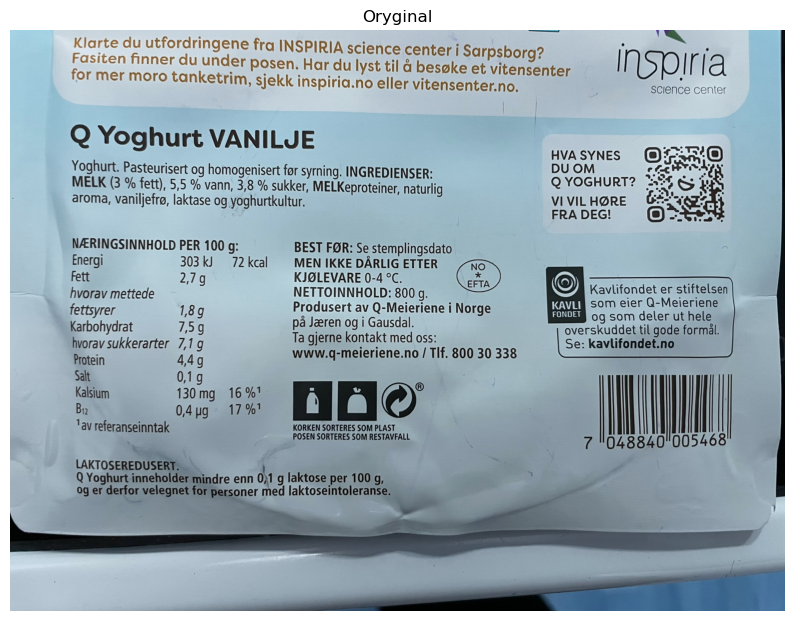

In [31]:
img_cv = cv2.imread(str(img_pth))
print(type(img_cv), img_cv.shape)
show_image(img_cv, "Oryginal")


<class 'numpy.ndarray'> (1536, 2048, 3)


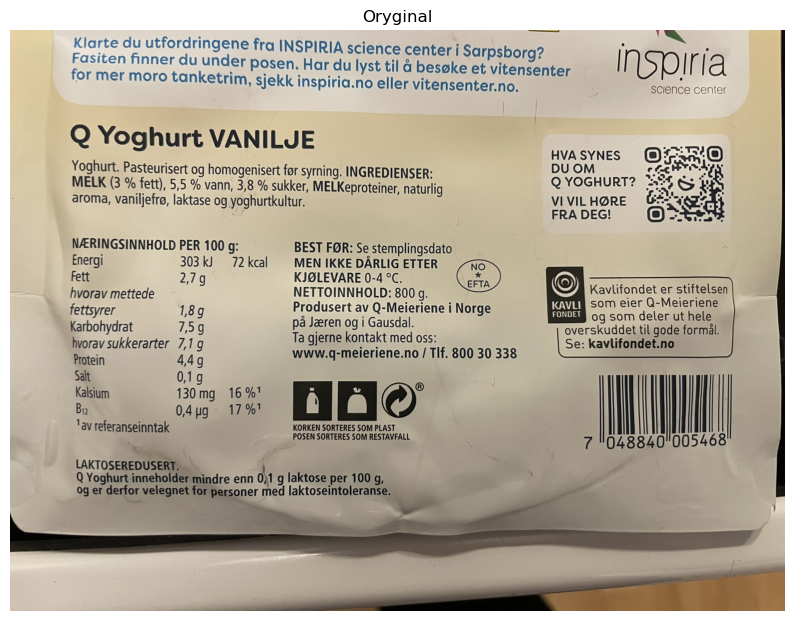

In [30]:
img_numpy = plt.imread(img_pth)
print(type(img_numpy), img_numpy.shape)

show_image(img_numpy, "Oryginal")


<class 'numpy.ndarray'> (1536, 2048)


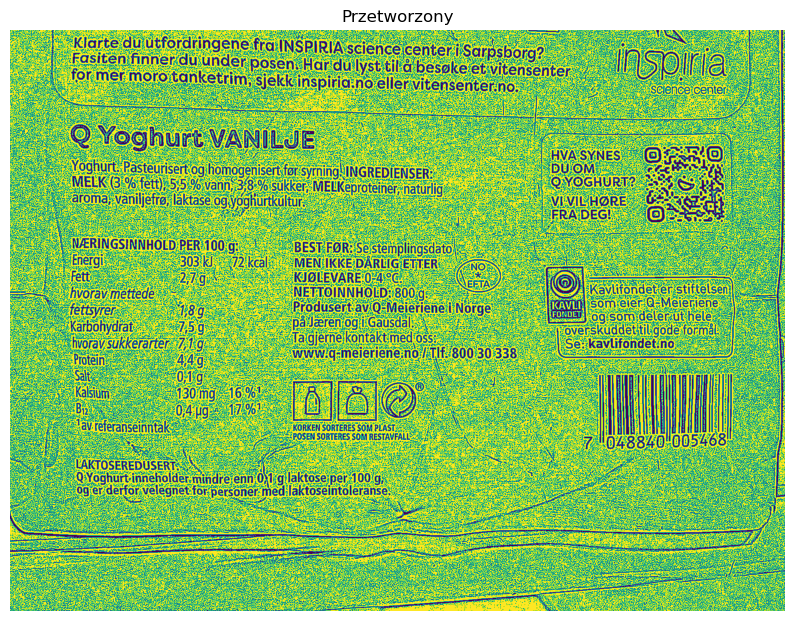

In [36]:
processed_image = processor.preprocess_image(img_pth)
print(type(processed_image), processed_image.shape)
show_image(processed_image, "Przetworzony")


2. Wyodrębnienie tekstu z obrazu

In [40]:

text_list = processor.extract_text(processed_image)
print(type(text_list), len(text_list))

for t in text_list:
    print(t)


<class 'list'> 98
Klarteduc
utfordringene fra INSPIRIA sciencecentel
Sarpsborg?
Fasiten finne
duunder posen
Har duilyst til å besøke et vitensenter
@Soiria
for
mer
moro
tanketrim; sjekk inspiria no eller vitensentevne
scienceicenter
Yoghurt VANILJE
HVASYNES
Yoghurt  Pasteurisert ogihomogenisert før syrning INGREDIENSER:
DU
@M
MELK(3 % fett) 559 vannf
8 % sukker
MELReproteiner; naturlig
0
Y@GHURT?
aroma; vaniljefro
lktase og yoghurtkultur:
VIIILHØRE
FRADEG!
NÆRINGSINNHOLDPER IOOg
BESTFØR: Se stemplingsdato
4*5
303k
72 kcal
MENIKKEDÅRLIGETTER
&@
Fett
2,74
KJØLEVAREOQ
Ka
Kfr
hvoravmëttede
NETTOINNHOLD:8OOZ
EETA
Kavlifondetier stiftelsen
fettsyrer
ProdusertavQ
Meerienei Norge
KaVWI
someie
Mêieriene
Karbohydrat
påJæren 0gi Gausdal
[FONDEI
0g somn deler uthele
759
ovërskyådëttil
e
formål
hvoravsukkerarter
7,19
Tagjerñekontaktmedoss:
SëkavlMfzndëtr
48;
no
WWW
meierieneno
{Tlf;80030338
222
42
Protein
4,49
Sdlt
0,1g
Kalsium
13oim9
169


B2
1a39
1
avreferanseinntak
KORKEN SORTERESSOM PLAST
'POSE


3. Parsowanie danych odżywczych
nutrition_facts = processor.parse_nutrition_facts(text_list)
print(nutrition_facts)

